                         EXPLORATORY DATA ANALYSIS(EDA) TASK

In [1]:
import pandas as pd 
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
titanic=pd.read_csv('titanic.csv')

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


**STEP 01: Ask meaningful questions about the dataset before analysis.**

In [3]:
#Q-1) What is the overall survival rate?

Survival_counts=titanic['survived'].value_counts(normalize =True)*100
print(f"Overall Survival Rate:")
print(Survival_counts)

Overall Survival Rate:
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [4]:
#Q-2) Did women and children have high survival rates than men?

#Group by sex 
survival_by_sex=titanic.groupby('sex')['survived'].mean()*100
print("\n Survival rate by sex:")
print(survival_by_sex)

#Group by 'who'(man, woman,child)
survival_by_who=titanic.groupby('who')['survived'].mean()*100
print("\n Survival rate by who(man,woman,child):")
print(survival_by_who)


 Survival rate by sex:
sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

 Survival rate by who(man,woman,child):
who
child    59.036145
man      16.387337
woman    75.645756
Name: survived, dtype: float64


In [5]:
#Q-3) Did passenger class affect survival chance?

survival_by_class=titanic.groupby('pclass')['survived'].mean()*100
print("\n Survival rate by passenger class:")
print(survival_by_class)



 Survival rate by passenger class:
pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


In [6]:
#Q-4) What are the most common embarkation points?

embarked_counts=titanic['embarked'].value_counts()
print("\n Passenger counts by embarkation point:")
print(embarked_counts)



 Passenger counts by embarkation point:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [7]:
#Q-5) Are there missing data?

missing_data=titanic.isnull().sum()
print("\n Missing values per column:")
print(missing_data)

#the code shows the missing values per column


 Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



Survived Distribution:
survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


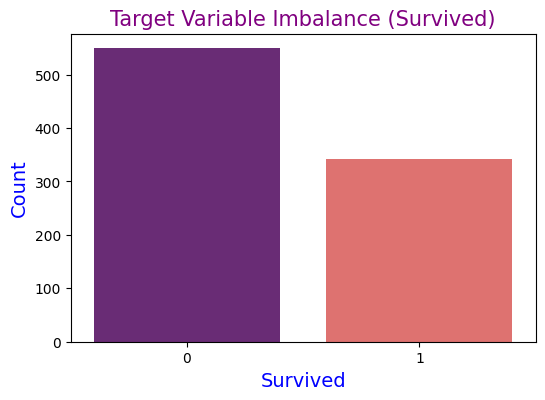

In [8]:
#Q-6) Check for imbalance in the target variable(survived)

Survival_counts = titanic['survived'].value_counts(normalize=True) * 100
print("\nSurvived Distribution:")
print(Survival_counts)

plt.figure(figsize=(6, 4))
palette = sns.color_palette('magma', n_colors=2)

sns.countplot(x='survived', data=titanic,hue='survived', palette=palette)

plt.title('Target Variable Imbalance (Survived)',color="Purple", fontsize=15)
plt.xlabel('Survived',color="Blue", fontsize=14)
plt.ylabel('Count',color="Blue", fontsize=14)
plt.legend([],[], frameon=False) 
plt.show()

#The target variable is survived,where 0= Did not survive & 1=Survived
#The count shows that about 61.6% of passengers did not survive and about 38.4% of passengers survived.

**STEP 02: Explore the data structure,including variables and datatypes**

In [9]:
print("First 5 rows of the dataset:")
print(titanic.head())

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [10]:
print("\nDataset info(datatypes and non null counts):")
titanic.info()


Dataset info(datatypes and non null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [11]:
print("\n Data types of each column:")
print(titanic.dtypes)


 Data types of each column:
survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [12]:
print ("\n Number of unique values per column:")
print(titanic.nunique())


 Number of unique values per column:
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [13]:
print("\n Dataframe shape (rows,columns):")
print(titanic.shape)


 Dataframe shape (rows,columns):
(891, 15)


In [14]:
print("\n Summary statistics of numerical columns: ")
print(titanic.describe())


 Summary statistics of numerical columns: 
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [15]:
print("\n Column names:")
print(titanic.columns.tolist())


 Column names:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [16]:
print ("\n Summary statistics for non-numeric columns (categorical col):")
print (titanic.describe (include = ['object']))



 Summary statistics for non-numeric columns (categorical col):
         sex embarked  class  who deck  embark_town alive
count    891      889    891  891  203          889   891
unique     2        3      3    3    7            3     2
top     male        S  Third  man    C  Southampton    no
freq     577      644    491  537   59          644   549


In [17]:
print ("\n Missing values in each col:")
print (titanic.isnull().sum())


 Missing values in each col:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [18]:
print("\n Summary statistics for all variables (numerical and categorical)")
print(titanic.describe (include = 'all'))

#NaN represents for "Not a Number".
#It represents missing and undefined data


 Summary statistics for all variables (numerical and categorical)
          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare e

In [19]:
print ("\n Percentage of missing values per column: ")
missing_percent=(titanic.isnull().sum()/len(titanic))*100
print(missing_percent)


 Percentage of missing values per column: 
survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


**STEP 03: Identify trends, patterns and anomalies within the data**

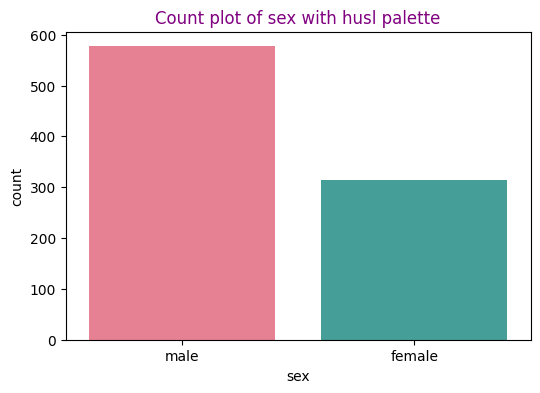

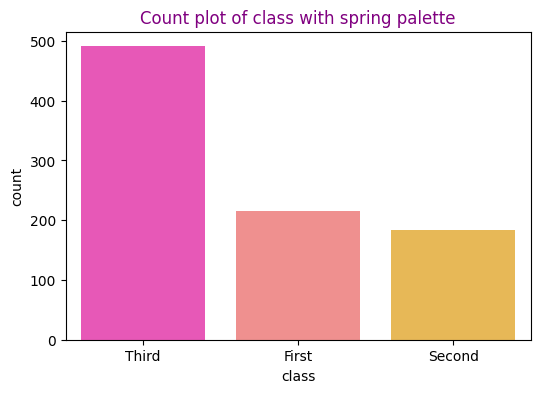

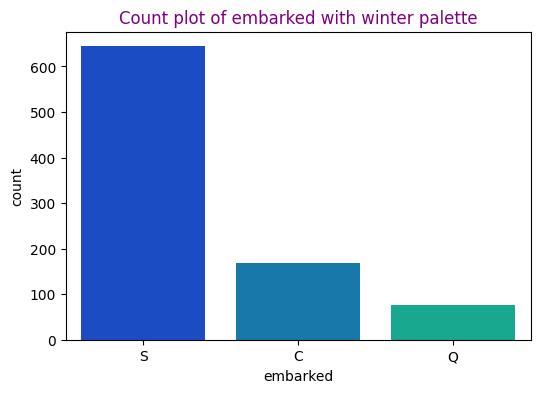

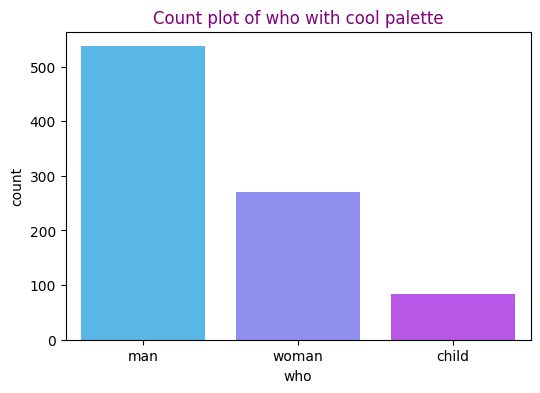

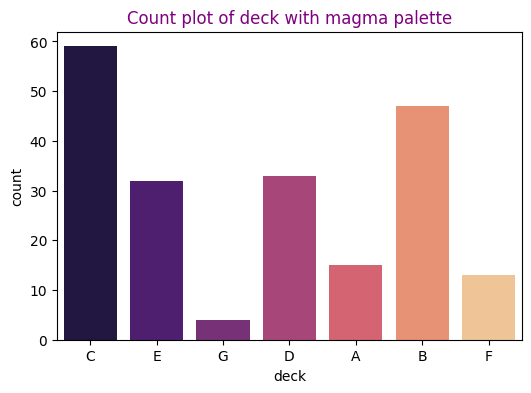

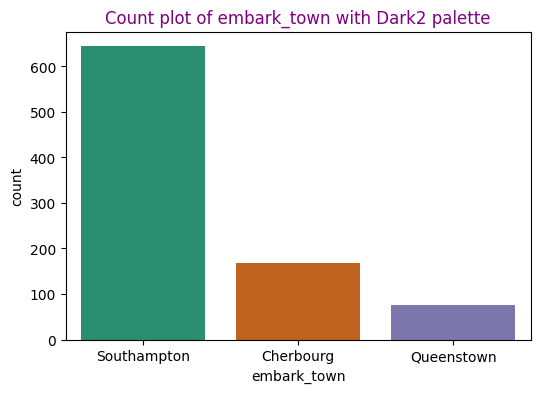

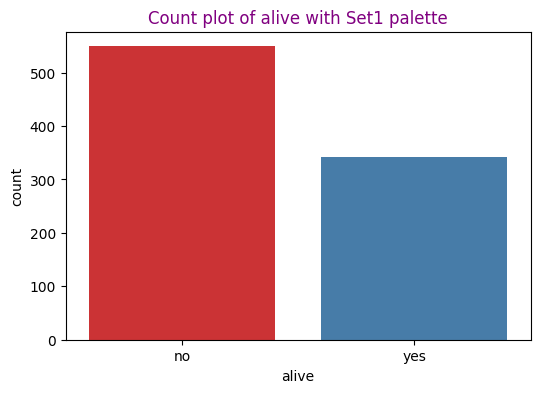

In [20]:
# Univariate analysis: categorical variables

categorical_vars = ['sex', 'class', 'embarked', 'who', 'deck','embark_town', 'alive']
palettes = ['husl', 'spring', 'winter', 'cool', 'magma', 'Dark2', 'Set1']
for var, pal in zip(categorical_vars,palettes):
   plt.figure(figsize=(6,4))
   num_unique=titanic[var].nunique()
   palette=sns.color_palette(pal,num_unique) 
   sns.countplot(x=var, data=titanic,palette=palette,hue=var,legend=False)
   plt.title(f"Count plot of {var} with {pal} palette",color="Purple")
   plt.show()

#Here the palette  argument defines the color scheme used in the plot.
#Specifically,it controls the colors of elements(like bars,lines, points) based on different categories or groups.

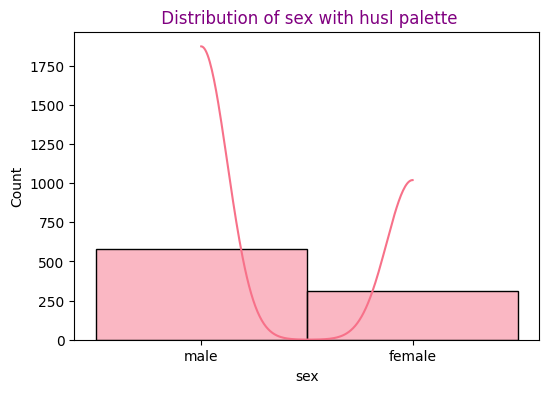

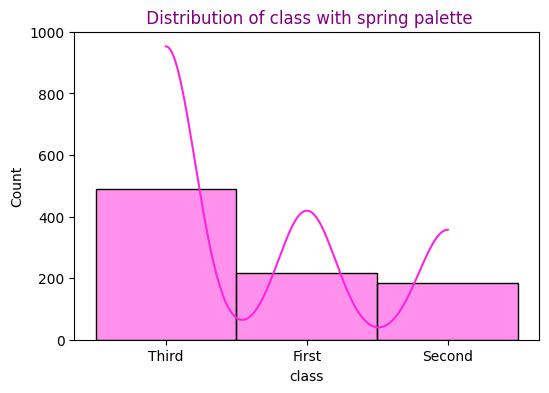

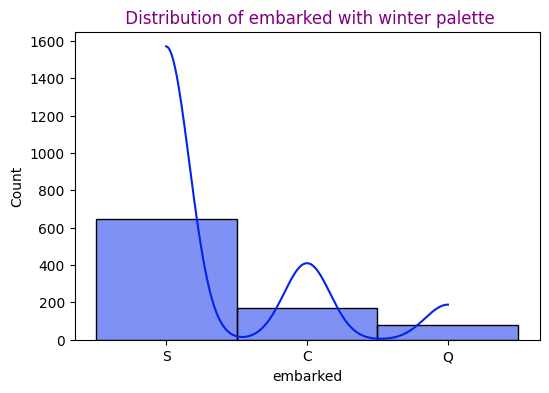

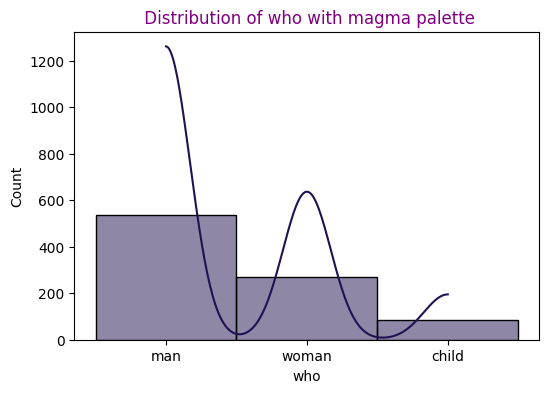

In [21]:
# Univariate analysis: numerical variables

numerical_vars = ['age', 'fare', 'sibsp', 'parch']
palettes = ['husl', 'spring', 'winter', 'magma']
for var, pal in zip(categorical_vars,palettes):
   plt.figure(figsize=(6,4))
   color=sns.color_palette(pal)[0] 
   sns.histplot(data=titanic,x=var,kde=True,color=color)
   plt.title(f" Distribution of {var} with {pal} palette",color="Purple")
   plt.show()

# Using sns.histplot() from Seaborn,which combines a histogram(bar plot of counts) with an optional KDE(Kernel Density Estimate)

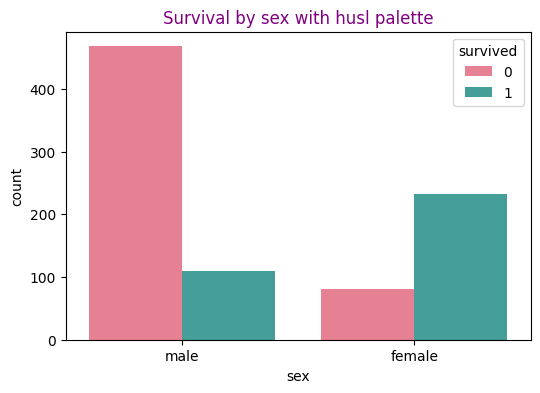

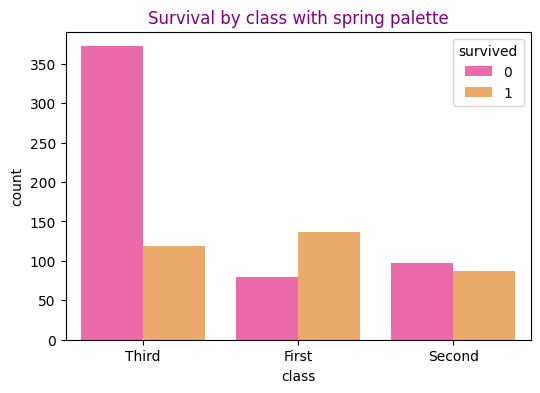

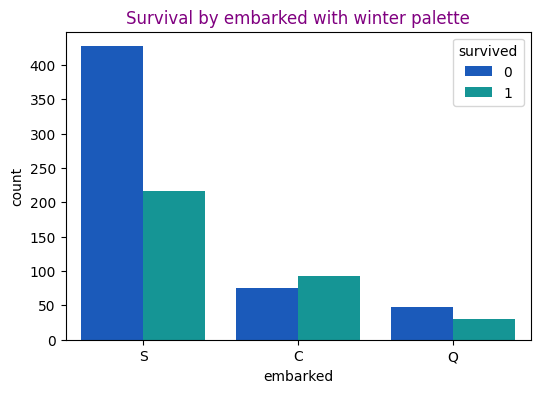

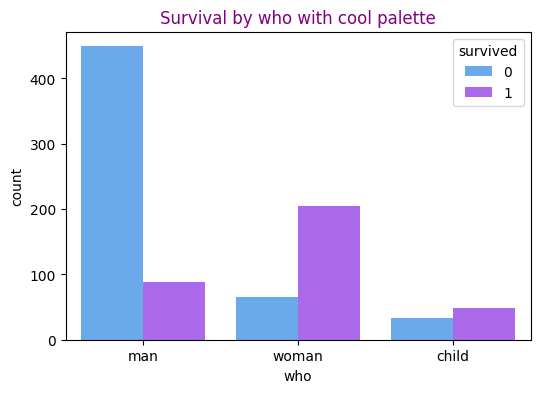

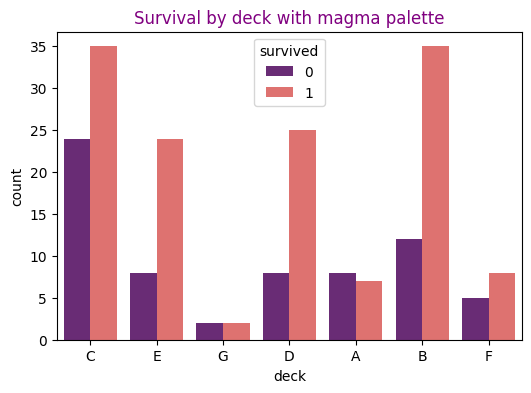

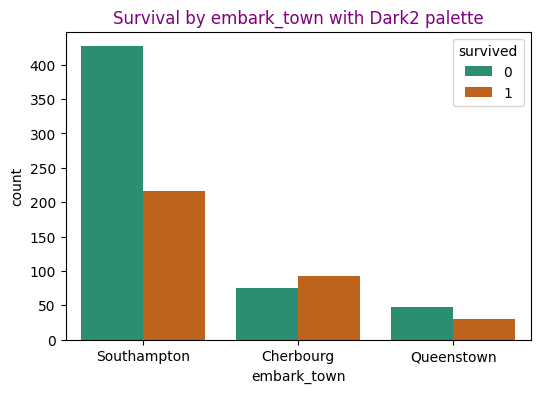

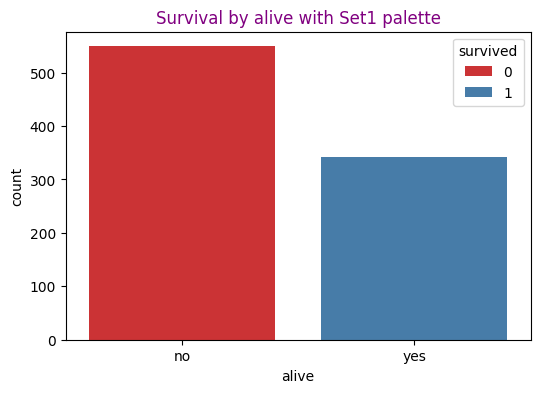

In [22]:
# Bivariate analysis : survival vs categorical variables
categorical_vars = ['sex', 'class', 'embarked', 'who', 'deck','embark_town', 'alive']
palettes = ['husl', 'spring', 'winter', 'cool', 'magma', 'Dark2', 'Set1']
for var, pal in zip(categorical_vars,palettes):
    plt.figure(figsize = (6,4))
    palette = sns.color_palette(pal,n_colors=2)
    sns.countplot( x = var,hue ='survived',data = titanic , palette = palette)
    plt.title (f"Survival by {var} with {pal} palette" , color = "Purple")
    plt.show()



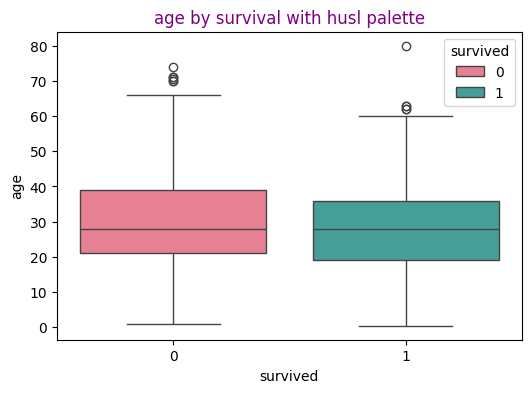

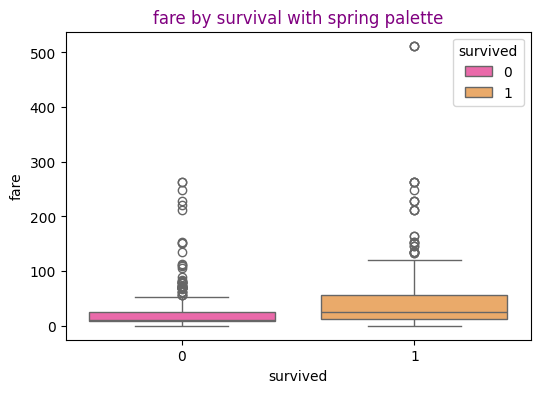

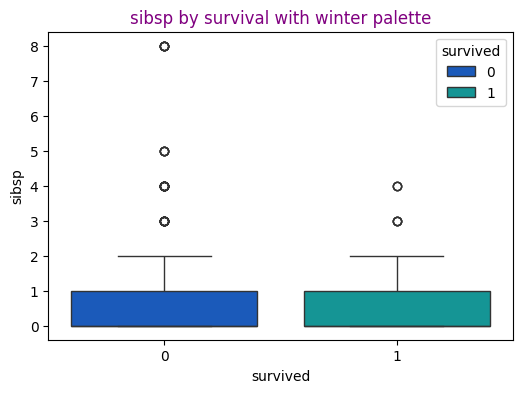

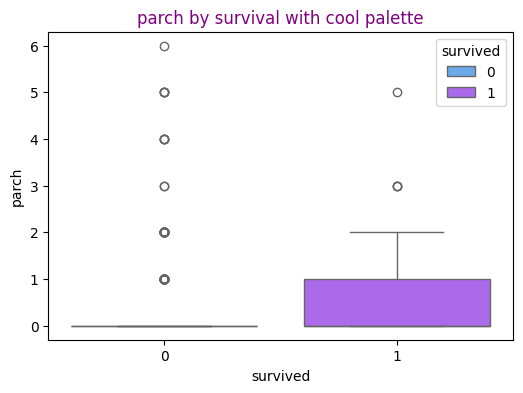

In [24]:
# Bivariate analysis : survival vs numerical variable 
numerical_vars = ['age', 'fare', 'sibsp', 'parch']
palettes = ['husl', 'spring', 'winter', 'cool']
for var, pal in zip(numerical_vars, palettes):
    plt.figure(figsize=(6, 4))
    palette = sns.color_palette(pal, n_colors=titanic['survived'].nunique())  # Generate correct number of colors
    sns.boxplot(x='survived', hue='survived', y=var, data=titanic, palette=palette)
    plt.title(f"{var} by survival with {pal} palette", color="Purple")
    plt.show()


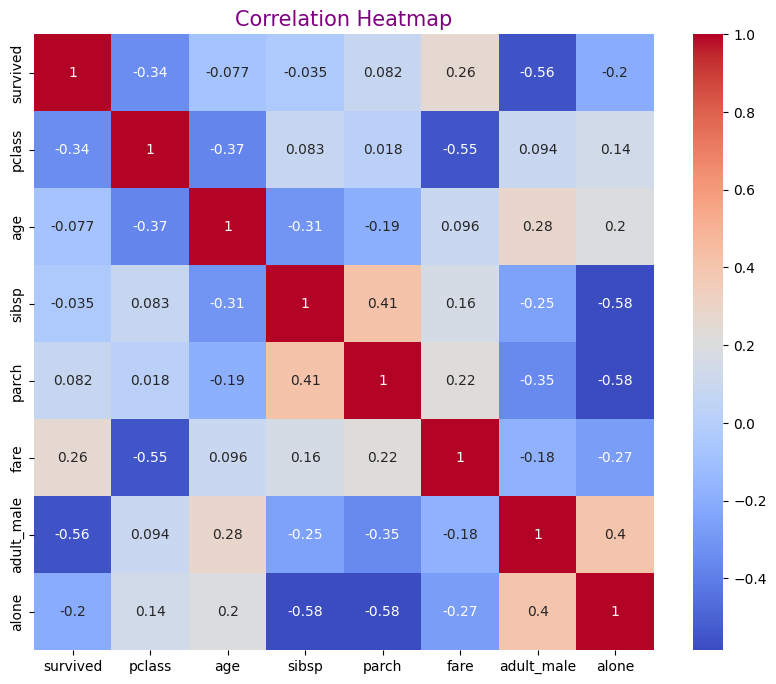

In [23]:
#Correlation heatmap of numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', color="Purple", fontsize=15)
plt.show()

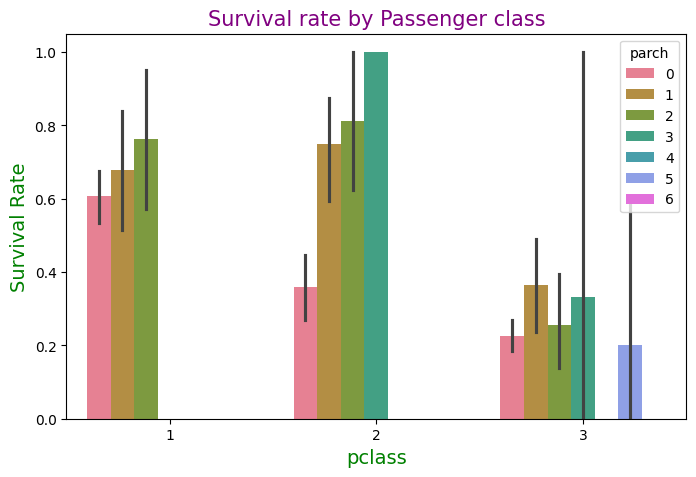

In [25]:
#Trend 1: Survival rate by class

plt.figure(figsize =(8,5))
palette = sns.color_palette('husl', n_colors=titanic['parch'].nunique())
sns.barplot(x='pclass', y='survived', data=titanic, hue='parch', palette=palette)
plt.title('Survival rate by Passenger class',color="Purple", fontsize=15)
plt.ylabel ('Survival Rate',color="Green", fontsize=14)
plt.xlabel('pclass',color="Green", fontsize=14)
plt.show()

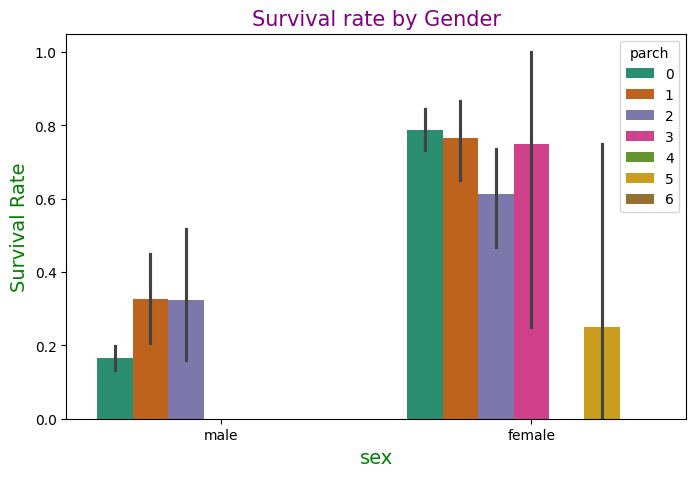

In [26]:
#Trend 2: Survival rate by gender

plt.figure(figsize =(8,5))
palette = sns.color_palette('Dark2', n_colors=titanic['parch'].nunique())
sns.barplot(x='sex', y='survived', data=titanic, hue='parch', palette=palette)
plt.title('Survival rate by Gender',color="Purple", fontsize=15)
plt.ylabel ('Survival Rate',color="Green", fontsize=14)
plt.xlabel('sex',color="Green", fontsize=14)
plt.show()

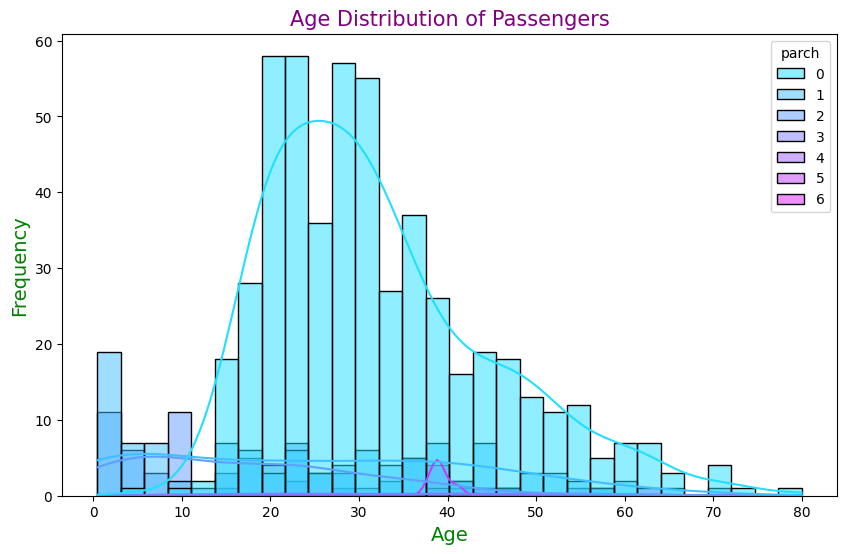

In [27]:
#Pattern: Age Distribution

plt.figure(figsize=(10, 6))
palette = sns.color_palette('cool', n_colors=titanic['parch'].nunique())
sns.histplot(data=titanic.dropna(subset=['age', 'parch']), x='age', bins=30, kde=True, hue='parch', palette=palette)
plt.title('Age Distribution of Passengers',color="Purple", fontsize=15)
plt.xlabel('Age',color="Green", fontsize=14)
plt.ylabel('Frequency',color="Green", fontsize=14)
plt.show()

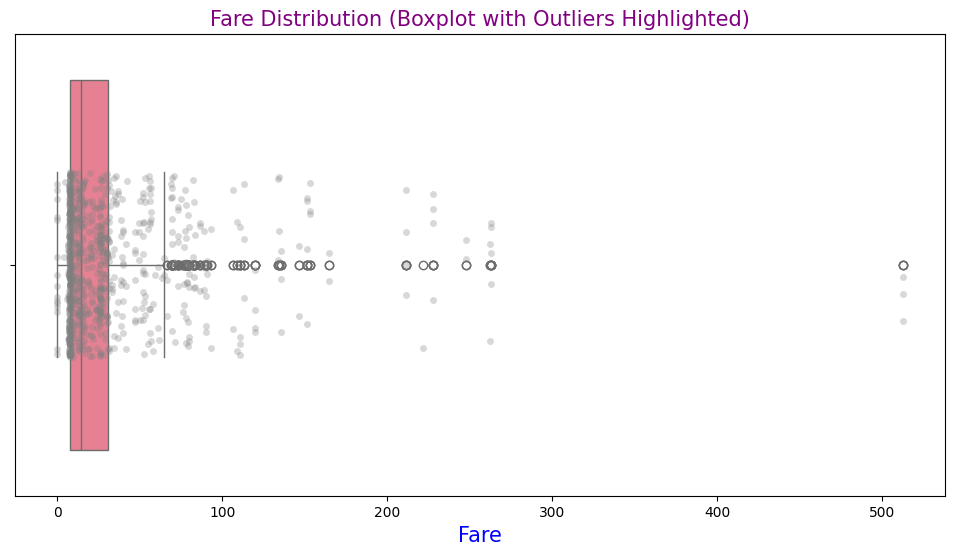

In [28]:
#Pattern:Fare Distribution(detecting outliers)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x='fare', data=titanic, color=sns.color_palette("husl", 1)[0], orient='h')
sns.stripplot(x='fare', data=titanic, color='gray', alpha=0.3, jitter=0.2, orient='h')
plt.title('Fare Distribution (Boxplot with Outliers Highlighted)',color="Purple", fontsize=15)
plt.xlabel('Fare',color="blue", fontsize=15)
plt.show()

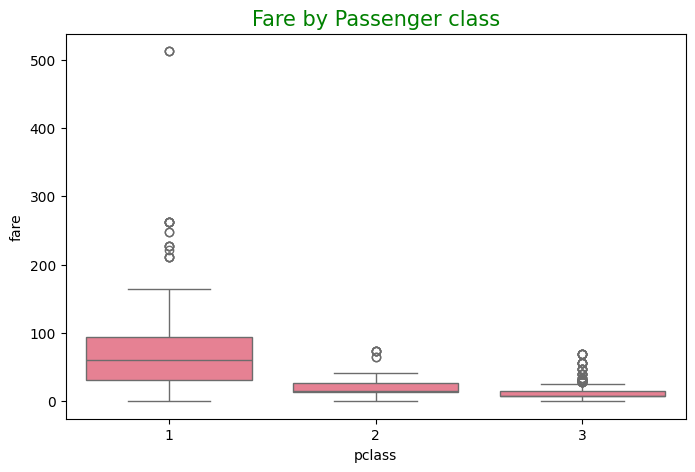

In [29]:
#Anomaly:Check Fare vs Pclass
plt.figure(figsize=(8,5))
palette = sns.color_palette("coolwarm", as_cmap=True)
sns.boxplot(x='pclass', y='fare', data=titanic,color=sns.color_palette("husl", 1)[0])
plt.title('Fare by Passenger class',color="Green", fontsize=15)
plt.show()

In [30]:
#Anomaly: Missing Data
missing_data=titanic.isnull().sum()
print("\n Missing values per column:")
print(missing_data)


 Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


**Step04: Test hypotheses and  validate assumptions using statistics and visualization**


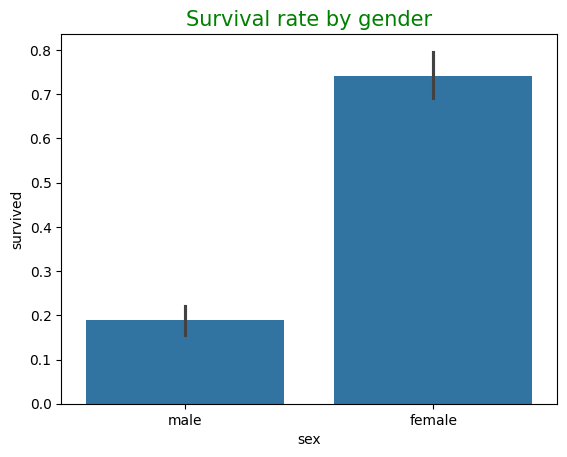

Chi-square test for Gender and Survival:
Chi2 Value: 260.7170
Degrees of Freedom: 1
P-value: 0.0000
Concluion:Reject null hypothesis.Gender affects survival.


In [44]:
#H1 : Women were more likely to survive than men
 
#Visualization 
sns.barplot(x='sex',y='survived', data=titanic)
plt.title('Survival rate by gender',color="Green", fontsize=15)
plt.show()

import pandas as pd
from scipy.stats import chi2_contingency
contingency_sex = pd.crosstab(titanic['sex'], titanic['survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency_sex)
print("Chi-square test for Gender and Survival:")
print(f"Chi2 Value: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")

#Interpretation
if p_value<0.05:
    print("Concluion:Reject null hypothesis.Gender affects survival.")
else:
    print("Conclusion:Fail to reject null hypothesis.No significant effect")

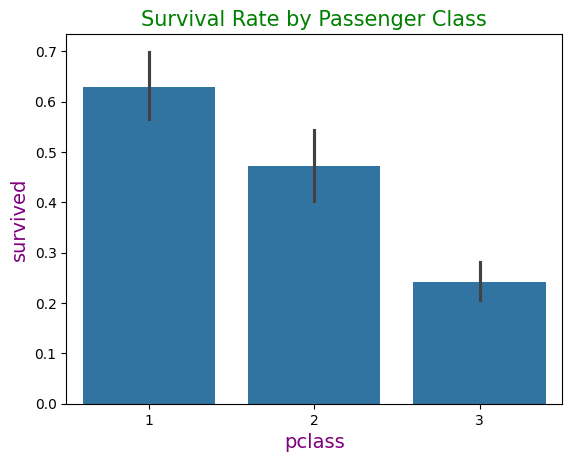

Chi2 Value: 102.8890
Degrees of Freedom: 2
P-value: 0.0000
Conclusion: Reject null hypotheses. Class affects survival.


In [35]:
#H2: Higher class(pclass) correlates with survival.

#Visualization
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class',color="Green", fontsize=15)
plt.xlabel('pclass',color="Purple", fontsize=14)
plt.ylabel('survived',color="Purple", fontsize=14)
plt.show()

# Chi-Square test of Independence for pclass and survived
import pandas as pd
from scipy.stats import chi2_contingency
contingency_class = pd.crosstab(titanic['pclass'], titanic['survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency_class)
print(f"Chi2 Value: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: Reject null hypotheses. Class affects survival.")
else:
    print("Conclusion: Fail to reject null hypotheses. No significant effect.")


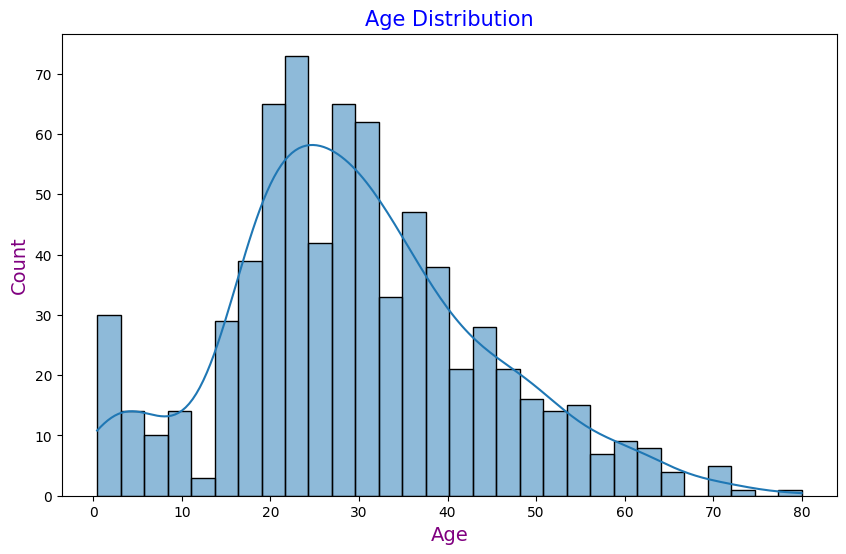

In [36]:
#Validate Age Distribution Assumption

plt.figure(figsize=(10,6))
sns.histplot(titanic['age'].dropna(),bins=30,kde=True)
plt.title('Age Distribution',color="Blue", fontsize=15)
plt.xlabel('Age',color="Purple", fontsize=14)
plt.ylabel('Count',color="Purple", fontsize=14)
plt.show()

**Step05: Detect potential data issues or problems to address in further analysis**

In [37]:
#1) Detect missing values
missing_data=titanic.isnull().sum()
print("Missing values per column:\n",missing_data)

Missing values per column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [38]:
#2)Checking Duplicate Records
duplicates=titanic.duplicated().sum()
print(f"Number of duplicate rows:{duplicates}")

Number of duplicate rows:107


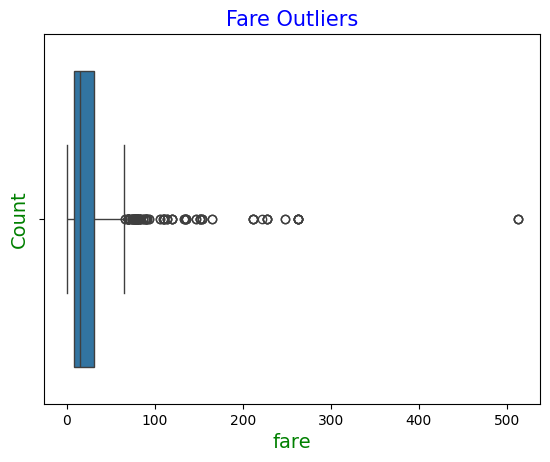

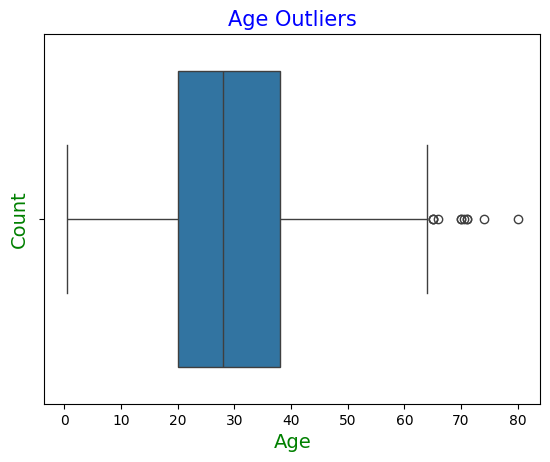

In [41]:
#3)Outliers in  numeric col(age,fare)using boxplots
sns.boxplot(x=titanic['fare'])
plt.title('Fare Outliers',color="Blue", fontsize=15)
plt.xlabel('fare',color="Green", fontsize=14)
plt.ylabel('Count',color="Green", fontsize=14)
plt.show()

sns.boxplot(x=titanic['age'])
plt.title('Age Outliers',color="Blue", fontsize=15)
plt.xlabel('Age',color="Green", fontsize=14)
plt.ylabel('Count',color="Green", fontsize=14)
plt.show()

In [42]:
#4) Datatype Mismatches:Checking data types
print("Data types of each column:\n", titanic.dtypes)

Data types of each column:
 survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [43]:
#5) Checking balance of survival column as imbalanced classes can bias ML models.
survival_counts = titanic['survived'].value_counts(normalize=True)
print("Survival rate distribution:\n", survival_counts)

Survival rate distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
